In [1]:
import numpy as np

## Math

int_{\Omega}f(\vec x)d\vec x \approx \frac {|\Omega|} k \sum \limits_{i=1}^kf(\vec {x_i})$

## Compute $\int_0^1 \int_0^2 xy^2 dxdy$

In [52]:
f = lambda x, y: x * y**2 
g = lambda x, y: 1 if (0 <= x <= 2 and 0 <= y <= 1) else -1

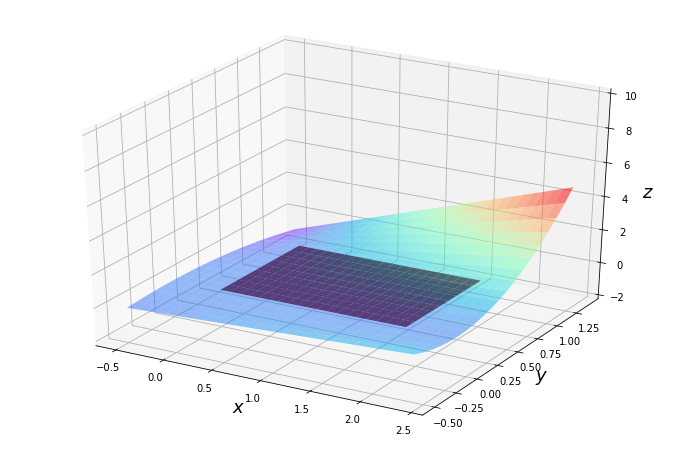

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-0.5, 2.5, 0.1)  
Y = np.arange(-0.5, 1.5, 0.1)  
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格  
Z = f(X, Y)
X0 = np.arange(0, 2, 0.1)
Y0 = np.arange(0, 1, 0.1)
X0, Y0 = np.meshgrid(X0, Y0)

fig = plt.figure(figsize=(12, 8))  
ax = fig.add_subplot(111, projection='3d')  
ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('rainbow'), alpha=0.5)  
ax.plot_surface(X0, Y0, np.zeros((10, 20)), color='r')
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.set_zlabel("$z$", fontsize=18)
ax.set_zlim(-2, 10)
plt.show()

## Monte Carlo Integral

In [57]:
def monte_carlo_integral(f, g, x0, x1, y0, y1, n):
    """
    Monte Carlo integration of f over a domain g>=0, embedded
    in a rectangle [x0,x1]x[y0,y1]. n^2 is the number of
    random points.
    """
    # Draw n**2 random points in the rectangle
    x = np.random.uniform(x0, x1, n)
    y = np.random.uniform(y0, y1, n)
    # Compute sum of f values inside the integration domain
    f_mean = 0
    num_inside = 0   # number of x,y points inside domain (g>=0)
    for i in range(len(x)):
        for j in range(len(y)):
            if g(x[i], y[j]) >= 0:
                num_inside += 1
                f_mean += f(x[i], y[j])
    f_mean = f_mean / float(num_inside)
    area = num_inside / float(n**2) * (x1 - x0) * (y1 - y0)
    return area * f_mean

In [55]:
monte_carlo_integral(f, g, 0, 2, 0, 1, 1000)

In [56]:
monte_carlo_integral(f, g, 0, 2, 0, 1, 2000)

In [58]:
monte_carlo_integral(f, g, 0, 2, 0, 1, 3000)

In [60]:
monte_carlo_integral(f, g, 0, 2, 0, 1, 5000)

### Using `Sympy`

In [41]:
import sympy
sympy.init_printing()

x, y = sympy.symbols("x, y")
f = x * y**2
f

In [44]:
sympy.integrate(f, (x, 0, 2), (y, 0, 1))